In [1]:
from pathlib import Path

from nilearn.interfaces.bids import get_bids_files, parse_bids_filename
from nilearn import datasets
from nilearn.maskers import NiftiMapsMasker, NiftiLabelsMasker
from nilearn import plotting
from sklearn.utils import Bunch

import pandas as pd

from connectivity.atlases import atlas_mapping


# TODO Complete test of rsn41
BIDSDIR = Path("/georges/memento/BIDS")
ATLAS = "schaeffer"

In [2]:

class Atlas(Bunch):
    @classmethod
    def from_kwargs(cls, name, soft, **atlas_kwargs) -> None:
        new = cls(**atlas_kwargs)

        new.is_soft = soft
        new.name = name
        return new
    
    @classmethod
    def from_name(cls, name, soft):
        atlas_kwargs = atlas_mapping[name]()
        new = cls(**atlas_kwargs)
        new.is_soft = soft
        new.name = name
        return new

    def get_coords(self):
        raise NotImplemented()
    
    def overlay(self):
        raise NotImplemented()

    def plot(self, **plotting_kwargs):
        if self.is_soft:
            return plotting.plot_prob_atlas(self.maps, title=self.name, **plotting_kwargs)
        else:
            return plotting.plot_roi(self.maps, title=self.name, **plotting_kwargs)

    # TODO test
    def fit_masker(self, **masker_kw):
        if self.is_soft:
            masker = NiftiMapsMasker(
                maps_img=self.maps,
                **masker_kw
            )
        else:
            masker = NiftiLabelsMasker(
                labels_img=self.maps
            )
        masker.fit()
        return masker
            

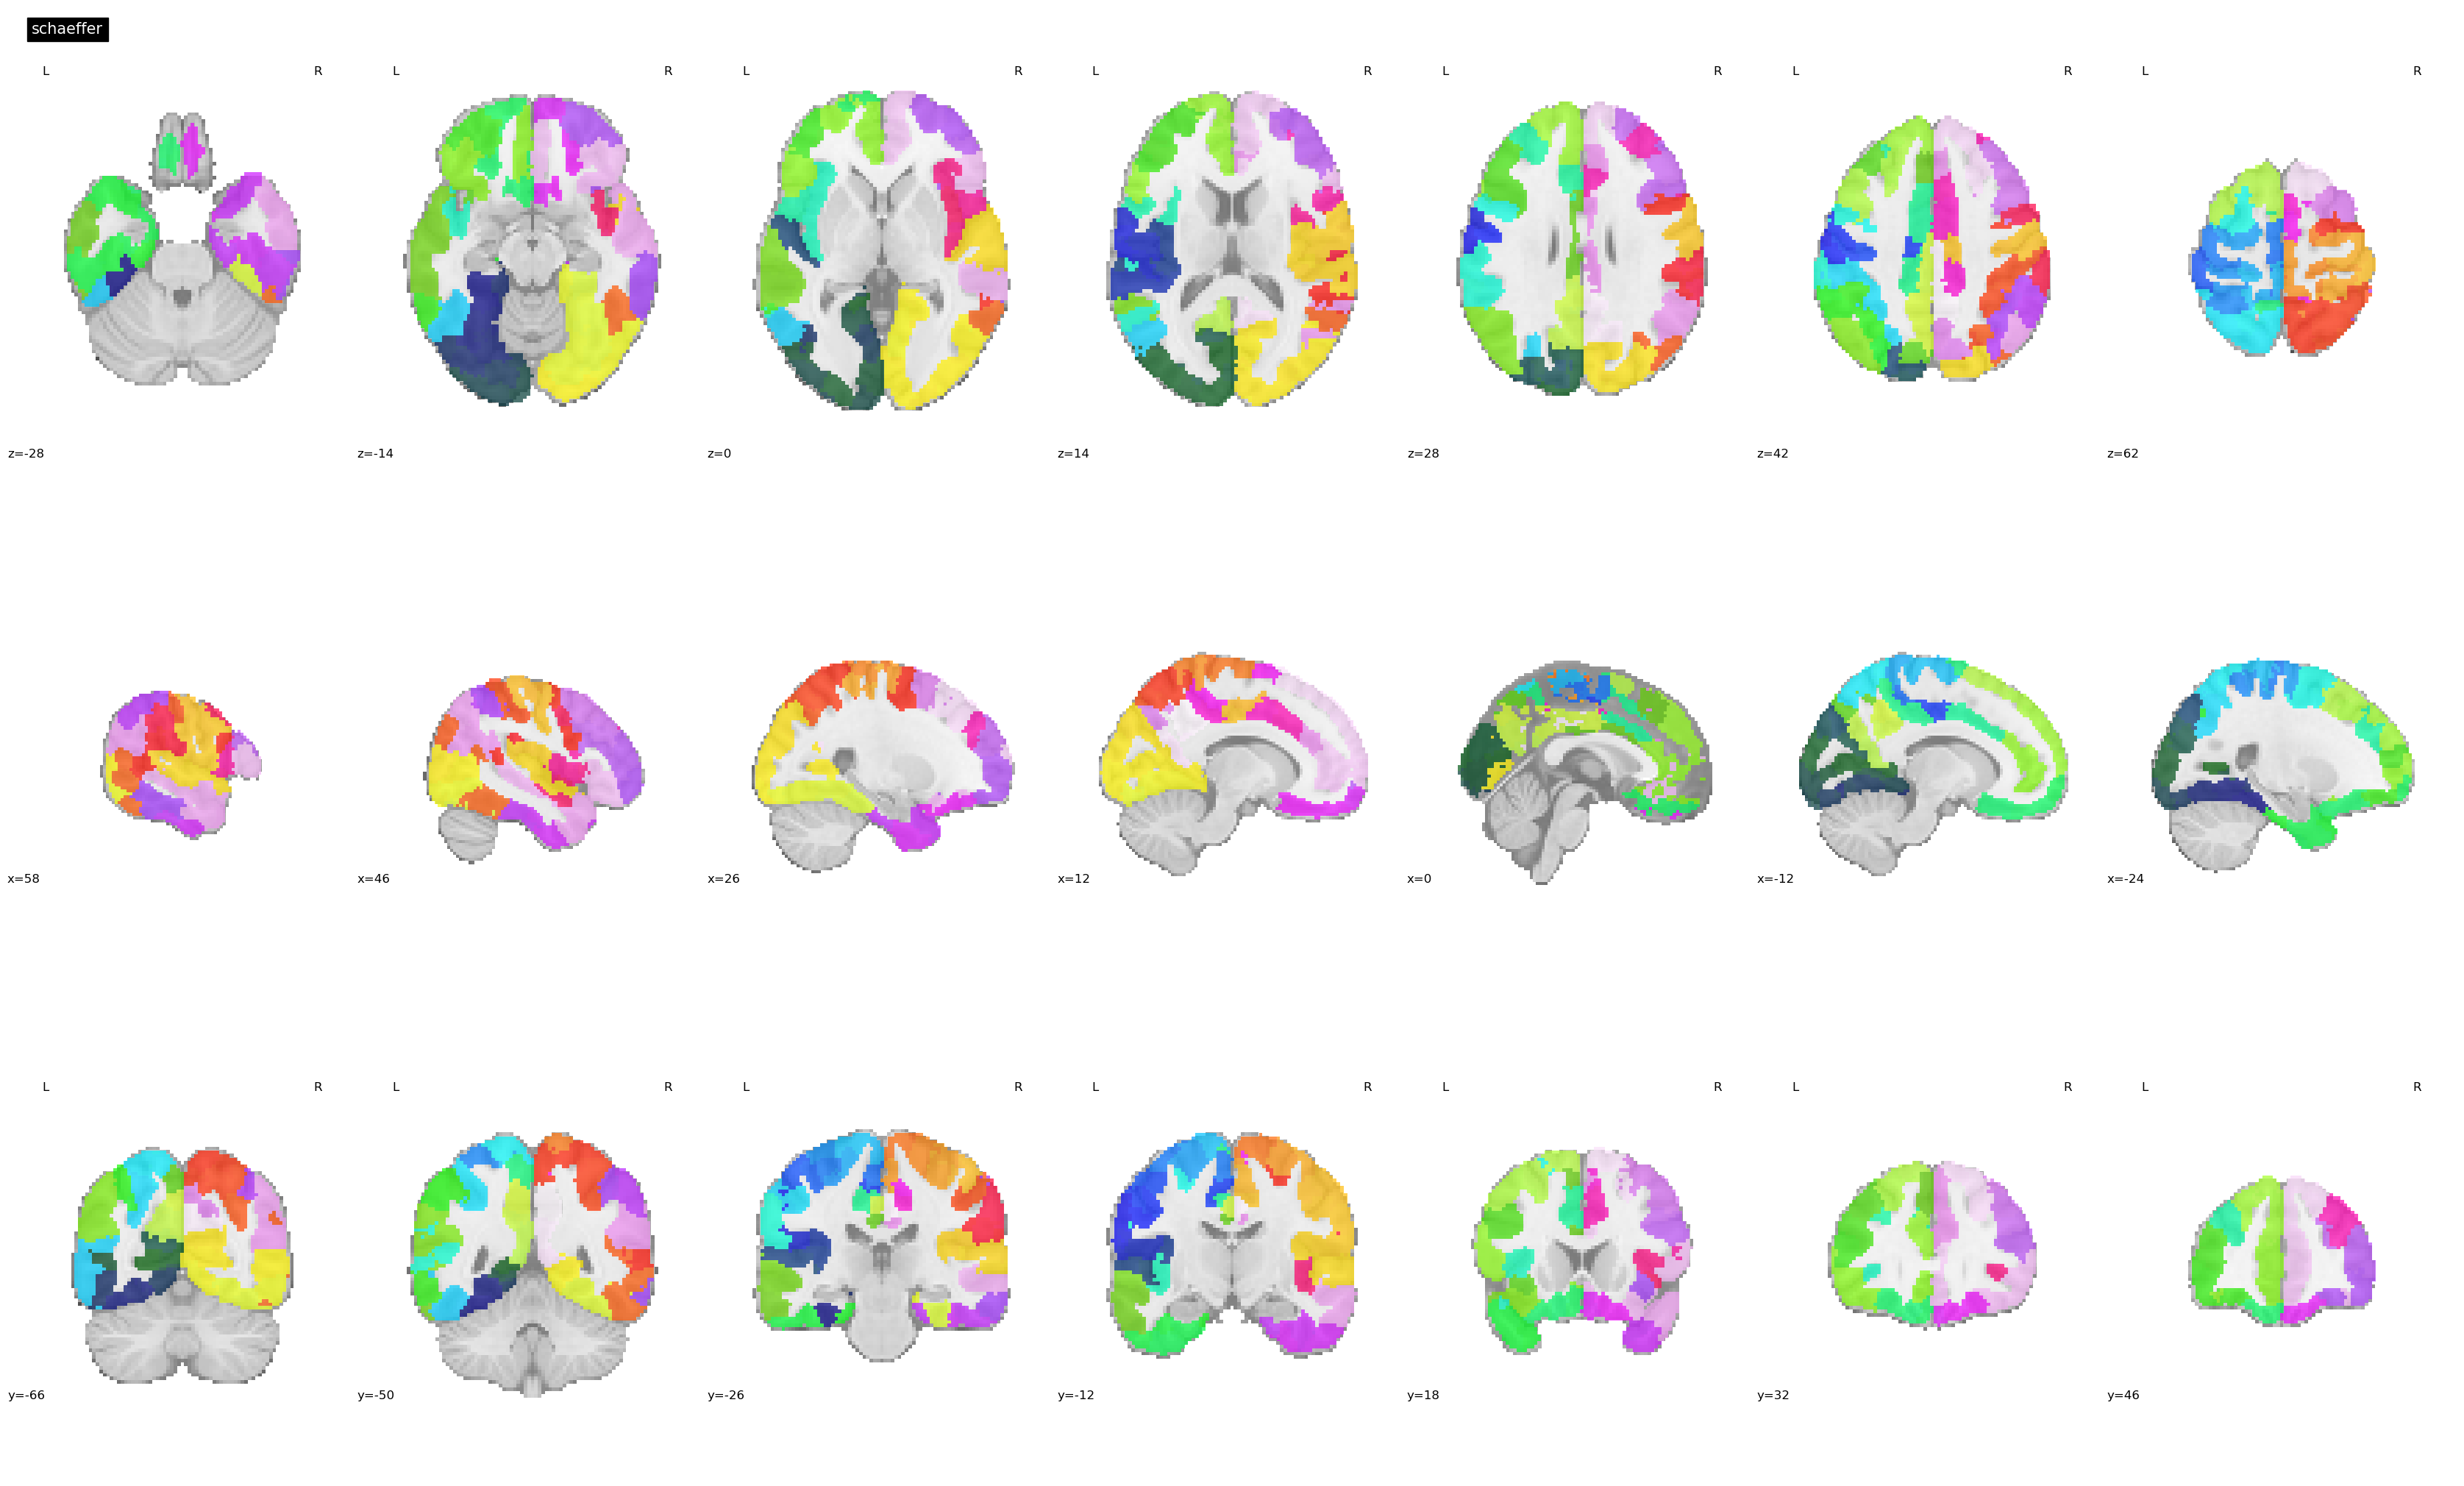

In [3]:
atlas = Atlas.from_name(ATLAS, soft=False)
atlas.plot(display_mode="mosaic")

In [20]:
fmri_path = get_bids_files(
    BIDSDIR / "derivatives/fmriprep-23.2.0",
    "bold",
    modality_folder="func",
    file_type="nii.gz",
    filters=[
    #    #("space", "MNI152NLin2009cAsym")
        ("space", "MNI152NLin6Asym")
    ],
)

In [21]:
df = pd.DataFrame(map(parse_bids_filename, fmri_path))

ses_count = df.groupby("sub")["ses"].count()

complete_subs = ses_count[ses_count == 3].index.to_list()
complete_df = df[df["sub"].isin(complete_subs)]

In [24]:
# TODO Link with phenotypes

phenotypes = pd.read_csv("/bigdata/jlegrand/data/Memento/phenotypes.tsv", sep="\t", encoding="unicode_escape")


In [32]:
phenotypes["sub"] = phenotypes["NUM_ID"].map(lambda x: x[4:])
phenotypes.sample(n=10)

,CEN_ANOM,NUM_ID,SEX,INCCONSDAT_D,AGE_CONS,NIVETUD,MCI,CDRSCR,MA,DEMENCE_DAT,APOE_eps4,APOE_geno,APOE_y,IRM_M0,IRM_M24,IRM_M48,sub
1107,QVM,SUBJ2154,Masculin,26/06/2012,79.0,"BEP, CAP, BAC",MCI amnésique multidomaine,0.5,NaN,NaN,0.0,eps3/eps3,Non,21/01/2013,09/03/2015,NaN,2154
494,EFW,SUBJ0918,Masculin,24/05/2011,67.0,>BAC,MCI amnésique multidomaine,0.5,NaN,NaN,0.0,eps3/eps3,Non,22/06/2011,NaN,NaN,0918
930,LPD,SUBJ1808,Féminin,20/01/2014,49.9,>BAC,MCI amnésique multidomaine,0,NaN,NaN,0.0,eps3/eps3,Non,08/07/2014,NaN,05/02/2018,1808
141,EFW,SUBJ0237,Masculin,23/06/2014,80.6,>BAC,MCI amnésique multidomaine,0,NaN,NaN,0.0,eps3/eps3,Non,07/10/2014,04/11/2016,07/12/2018,0237
1122,RQS,SUBJ2187,Féminin,22/03/2012,78.1,>BAC,MCI amnésique multidomaine,0.5,NaN,NaN,0.0,eps3/eps3,Non,22/03/2012,NaN,NaN,2187
848,EFW,SUBJ1646,Masculin,13/03/2014,80.2,>BAC,MCI non amnésique multidomaine,0,NaN,NaN,0.0,eps2/eps3,Non,03/04/2014,09/03/2016,04/06/2018,1646
663,EFW,SUBJ1292,Féminin,03/10/2012,71.1,"BEP, CAP, BAC",MCI amnésique multidomaine,0.5,NaN,NaN,0.0,eps3/eps3,Non,19/10/2012,25/09/2014,03/10/2016,1292
1194,QVM,SUBJ2352,Féminin,10/09/2012,70.1,>BAC,MCI non amnésique multidomaine,0,NaN,NaN,1.0,eps3/eps4,Oui,27/11/2012,16/04/2015,NaN,2352
41,NRR,SUBJ0069,Féminin,03/05/2012,78.8,<= BEPC,MCI amnésique multidomaine,0.5,NaN,NaN,1.0,eps3/eps4,Oui,05/06/2012,14/10/2014,NaN,0069
311,DOT,SUBJ0541,Masculin,12/04/2013,69.7,>BAC,MCI non amnésique multidomaine,0.5,NaN,NaN,1.0,eps3/eps4,Oui,25/05/2013,NaN,16/09/2017,0541


In [31]:
any(phenotypes["sub"] == "0007")

False

In [26]:
complete_df

,file_path,file_basename,file_tag,file_type,file_fields,sub,ses,task,space,res,desc
0,/georges/memento/BIDS/derivatives/fmriprep-23....,sub-0001_ses-M000_task-rest_space-MNI152NLin6A...,bold,nii.gz,"[sub, ses, task, space, res, desc]",0001,M000,rest,MNI152NLin6Asym,2,preproc
1,/georges/memento/BIDS/derivatives/fmriprep-23....,sub-0001_ses-M024_task-rest_space-MNI152NLin6A...,bold,nii.gz,"[sub, ses, task, space, res, desc]",0001,M024,rest,MNI152NLin6Asym,2,preproc
2,/georges/memento/BIDS/derivatives/fmriprep-23....,sub-0001_ses-M048_task-rest_space-MNI152NLin6A...,bold,nii.gz,"[sub, ses, task, space, res, desc]",0001,M048,rest,MNI152NLin6Asym,2,preproc
8,/georges/memento/BIDS/derivatives/fmriprep-23....,sub-0007_ses-M000_task-rest_space-MNI152NLin6A...,bold,nii.gz,"[sub, ses, task, space, res, desc]",0007,M000,rest,MNI152NLin6Asym,2,preproc
9,/georges/memento/BIDS/derivatives/fmriprep-23....,sub-0007_ses-M024_task-rest_space-MNI152NLin6A...,bold,nii.gz,"[sub, ses, task, space, res, desc]",0007,M024,rest,MNI152NLin6Asym,2,preproc
...,...,...,...,...,...,...,...,...,...,...,...
2153,/georges/memento/BIDS/derivatives/fmriprep-23....,sub-1889_ses-M024_task-rest_space-MNI152NLin6A...,bold,nii.gz,"[sub, ses, task, space, res, desc]",1889,M024,rest,MNI152NLin6Asym,2,preproc
2154,/georges/memento/BIDS/derivatives/fmriprep-23....,sub-1889_ses-M048_task-rest_space-MNI152NLin6A...,bold,nii.gz,"[sub, ses, task, space, res, desc]",1889,M048,rest,MNI152NLin6Asym,2,preproc
2159,/georges/memento/BIDS/derivatives/fmriprep-23....,sub-1896_ses-M000_task-rest_space-MNI152NLin6A...,bold,nii.gz,"[sub, ses, task, space, res, desc]",1896,M000,rest,MNI152NLin6Asym,2,preproc
2160,/georges/memento/BIDS/derivatives/fmriprep-23....,sub-1896_ses-M024_task-rest_space-MNI152NLin6A...,bold,nii.gz,"[sub, ses, task, space, res, desc]",1896,M024,rest,MNI152NLin6Asym,2,preproc


In [33]:
m = pd.merge(
    left=complete_df,
    right=phenotypes,
    how="left",
    on="sub"
)

In [36]:
m[m.MCI.isna()]

TypeError: Series.isna() takes 1 positional argument but 2 were given